In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
df.shape

(1338, 7)

In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
for i in df.columns:
    print(i)
    #print(df[i].value_counts())
    print(df[i].nunique()/df.shape[0])

age
0.035127055306427506
sex
0.0014947683109118087
bmi
0.40956651718983555
children
0.004484304932735426
smoker
0.0014947683109118087
region
0.0029895366218236174
charges
0.9992526158445441



sex, children, smoker, region seem like categorical variables

In [63]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [64]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [65]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [66]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [67]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [68]:
cat_cols=['sex', 'smoker', 'region']
target_cols=['charges']
num_cols=[col for col in df.columns if col not in cat_cols+target_cols]
num_cols

['age', 'bmi', 'children']

Univariate EDA

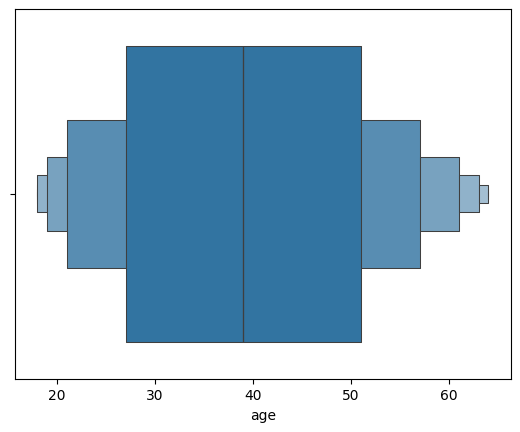

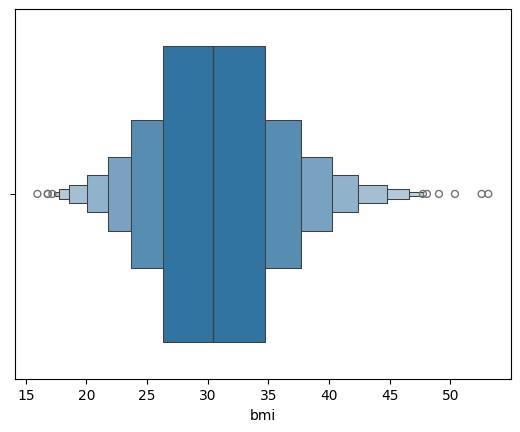

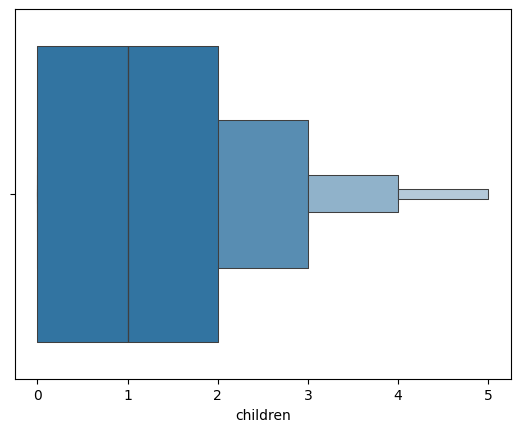

In [69]:
for i in num_cols:
    plt.figure()
    sns.boxenplot(data=df, x=i)
    

children is not a classical numerical column, can come back to this

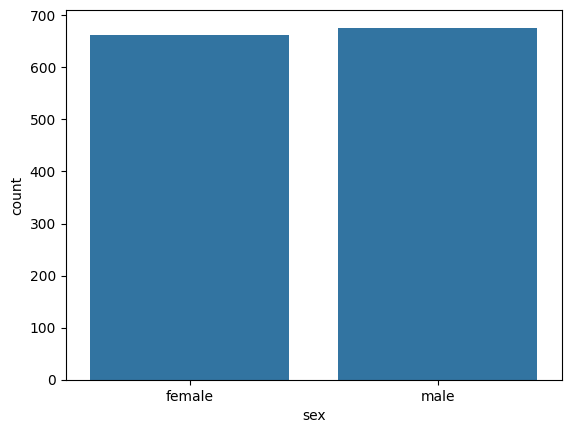

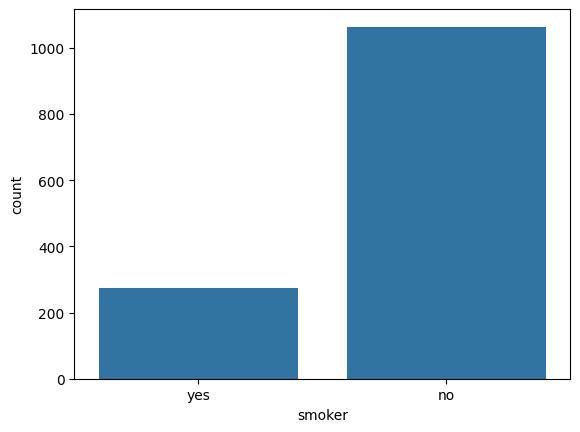

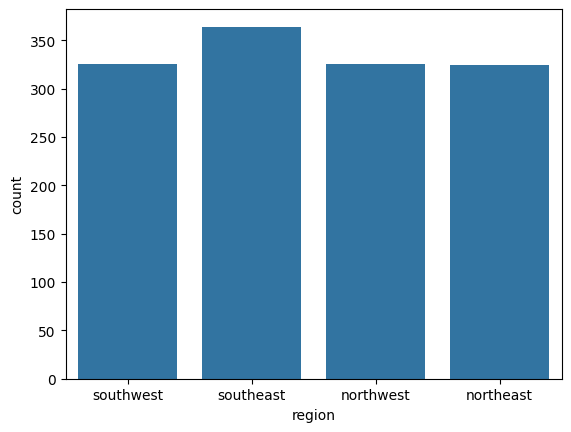

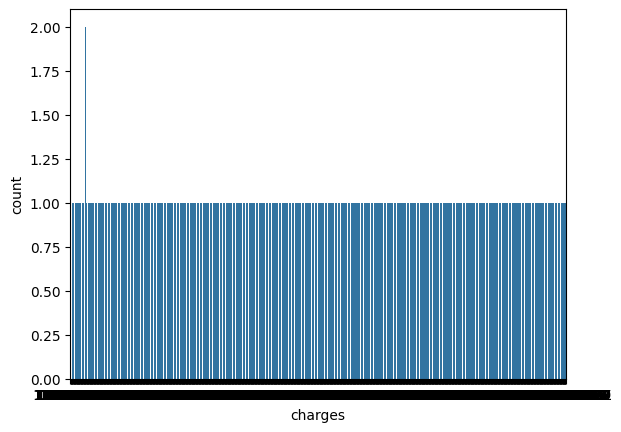

In [70]:
for i in cat_cols+target_cols:
    plt.figure()
    sns.countplot(data=df, x=i)
    

<Axes: xlabel='charges', ylabel='Density'>

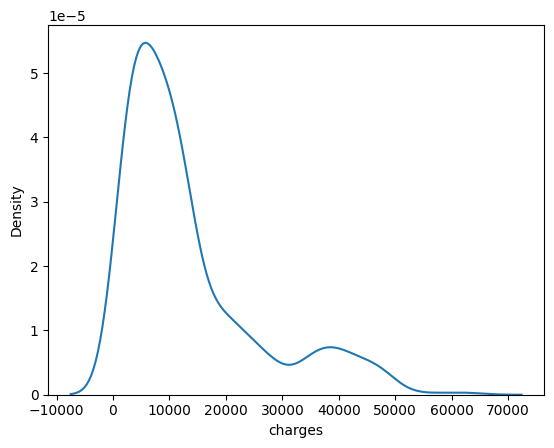

In [71]:
plt.figure()
sns.kdeplot(data=df, x='charges')

1. evenly distributed sample between male and female
2. evenly distributed across regions
3. skewed towards non-smoker
4. age and bmi are normally distributed
5. Charges seem to be normally distributed (with skew) with mean of 8000

In [72]:
df['charges'].describe().T

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

bivariate EDA

In [73]:
cat_cols

['sex', 'smoker', 'region']

In [74]:
df2=pd.get_dummies(df, columns=cat_cols, dtype=int)
df2

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


<Axes: >

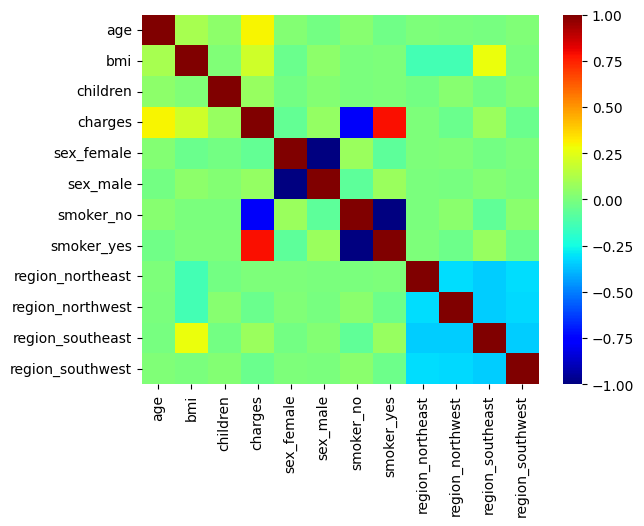

In [75]:
df_corr=df2.corr()
sns.heatmap(df_corr, cmap='jet')

CHARGES shows correlation with smoker_yes, smoker_no and age

now, lets build an ML model

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [85]:
X=df2.drop(columns=['charges'])
y=df2['charges']

In [86]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=41)

In [87]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
y_pred=rf.predict(X_test)

In [95]:
print('r2_score: ', r2_score(y_test, y_pred))

r2_score:  0.8082596350351778


In [92]:
fe=pd.Series(rf.feature_importances_, index=X_train.columns)
fe.sort_values(ascending=True, inplace=True)
fe.plot.barh()

In [97]:
params={'n_estimators':[100, 200, 400, 800], 'max_depth':[4,8,12], 'max_features':['auto','sqrt','log2']}
cv=GridSearchCV(rf, param_grid=params, cv=5)
cv.fit(X_train, y_train)
cv.best_params_

c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 400}

In [98]:
rf2=RandomForestRegressor(**cv.best_params_)
rf2.fit(X_train, y_train)
y_pred2=rf.predict(X_test)

print('r2_score: ', r2_score(y_test, y_pred2))

r2_score:  0.8082596350351778


<Axes: >

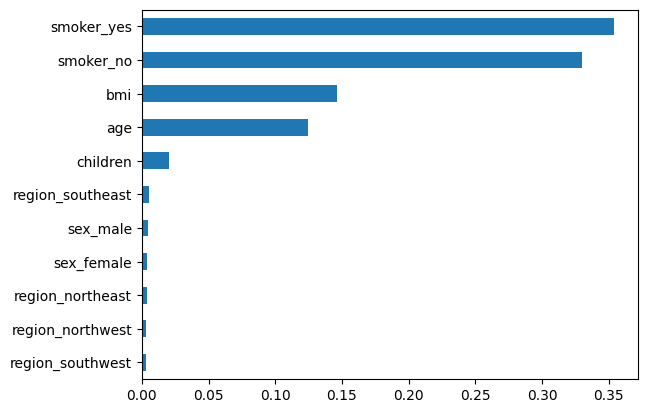

In [100]:
fe2=pd.Series(rf2.feature_importances_, index=X_train.columns)
fe2.sort_values(ascending=True, inplace=True)
fe2.plot.barh()
